<a href="https://colab.research.google.com/github/ishriana/Projects/blob/main/Predicting_Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting Heart Disease**

Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Source of dataset: (https://www.kaggle.com/ronitf/heart-disease-uci) Problem Statement: Predict whether the given patient is suffering from heart disease

Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


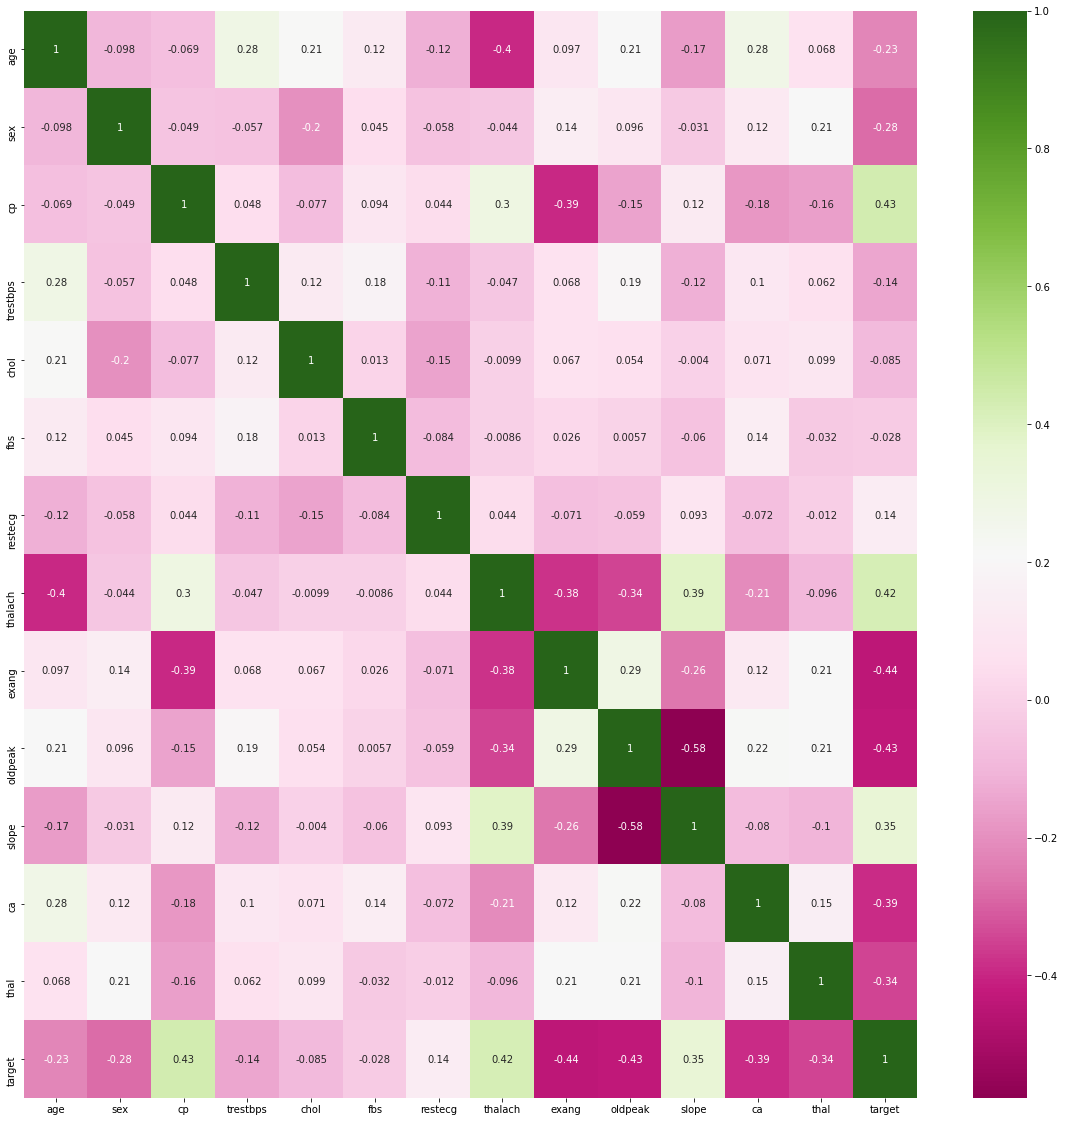

In [ ]:
corrmatrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmatrix,annot=True,cmap='PiYG')

1. Most of the features have a negative co-relation with the target variable.
2. feature [cp and thalach] have the strongest positive co-relation with target
3. [exang, oldpeak, ca and thal] have strong negative co-relation

Next we will check if the dataset is balanced. We will use a count plot on target column.

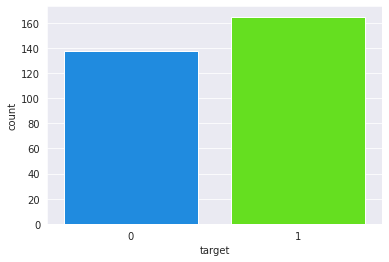

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='target',data=df,palette = 'gist_rainbow_r')

People not having heart disease are: 140 and with heart disease are: 162. In short dataset looks pretty stable.

Next we will jump to model building

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


One hot encoding to categorical columns

In [ ]:
df = pd.get_dummies(df, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [ ]:
scaler = StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [ ]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


**K Nearest Neighbors Classifier**

In [ ]:
x = df.drop('target', axis=1)
y = df['target']

1. First we will use K-nearest-neighbours algorithm along with cross validation.
2. Values of k will range from 1-14 and cv of 10 sets will be performed on each set ie each value of k 
3. We ll store these values in a list knn_scores
4. So knn_scores has 14 lists inside it with each list having 10 values
5. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []

for i in range(1,15):
  classifier = KNeighborsClassifier(n_neighbors = i)
  scores = cross_val_score(classifier, x , y , cv = 10)
  knn_scores.append(scores)


In [ ]:
len(knn_scores)

14

In [ ]:
knn_scores[0].mean()

0.7455913978494624

1. Now we will create another list having the mean scores of every 10 elements in 14 lists of knn_scores. Lets name it as mean_knn
2. The max of value in mean_knn would be our pick

In [ ]:
mean_knn = []
for i in range(0,len(knn_scores)):
  mean = knn_scores[i].mean()
  mean_knn.append(round(mean,3))

In [ ]:
max(mean_knn)

0.845

Plotting a graph of k versus mean_knn. we will update the graph with each node reflecting the number of k and the corresponding score for that set.

Text(0.5, 1.0, 'Score v/s Neighbors')

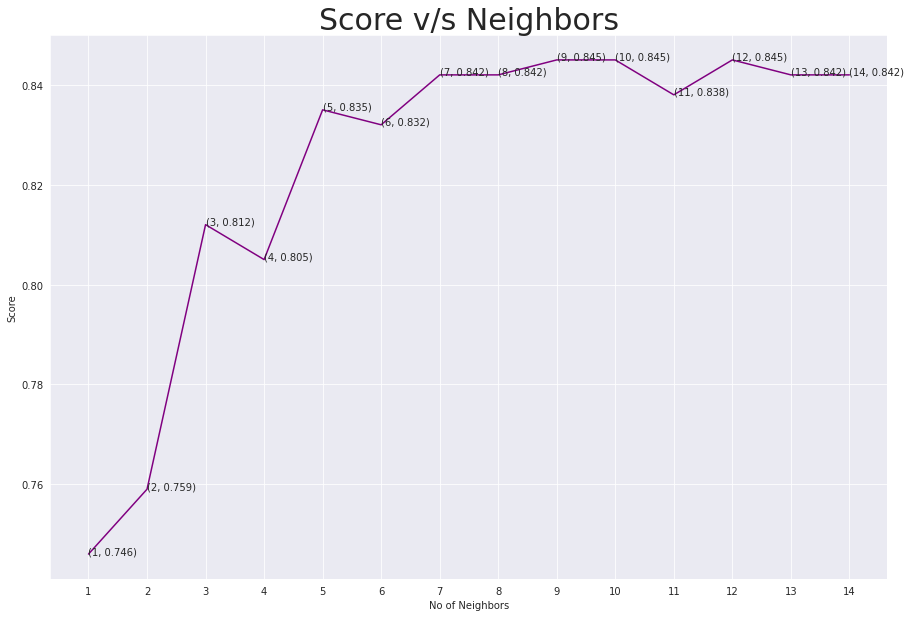

In [ ]:
plt.figure(figsize=(15,10))
plt.plot([i for i in range(1,15)],mean_knn, color='purple')
plt.xticks([i for i in range(1,15)])
for i in range(1,15):
  plt.text(i,mean_knn[i-1],(i,mean_knn[i-1]))
plt.xlabel('No of Neighbors')
plt.ylabel('Score')
plt.title('Score v/s Neighbors', fontsize=30)


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=10)
score = cross_val_score(classifier,x,y,cv=10)
print(round(score.mean(),3))

0.845


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators=150,max_depth=10, min_samples_split=2)
scores2 = cross_val_score(rfclassifier,x,y,cv=10)

In [ ]:
scores.mean()

0.8415053763440861

Tuning with various parameters and cross validating we are getting a fixed output of 84% accuracy which is slightly less than knn model